In [1]:
# 1)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("telecom_customer_churn.csv")
df

C:\Users\niraj_1kwckht\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\niraj_1kwckht\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [2]:
# 2)
print(df.head())  # View the first few rows
print(df.info())  # Get information about the dataset
print(df.describe())  # Descriptive statistics

  Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charg

In [3]:
# 3)
df.fillna(0, inplace=True)  # handling missing values

In [4]:
# 4)
df.drop_duplicates(inplace=True) #removing duplicates

In [5]:
# 5)
df['Gender'] = df['Gender'].str.lower()  # Example: Standardize gender to lowercase

In [6]:
# 6)
df['TotalCharges'] = pd.to_numeric(df['Total Charges'], errors='coerce')  # Convert TotalCharges to numeric

In [7]:
# 7) remove outliers from the TotalCharges column:
z_scores = (df['TotalCharges'] - df['Total Charges'].mean()) / df['Total Charges'].std()
df = df[(z_scores.abs() < 3)]

In [8]:
# 8) 
df['TenureinMonths'] = df['Tenure in Months'] * 30  # create new features - Convert tenure to months
df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,TotalCharges,TenureinMonths
0,0002-ORFBO,female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,593.30,0.00,0,381.51,974.81,Stayed,0,0,593.30,270
1,0003-MKNFE,male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,542.40,38.33,10,96.21,610.28,Stayed,0,0,542.40,270
2,0004-TLHLJ,male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,280.85,120
3,0011-IGKFF,male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,1237.85,390
4,0013-EXCHZ,female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,267.40,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,742.90,0.00,0,606.84,1349.74,Stayed,0,0,742.90,390
7039,9992-RRAMN,male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction,1873.70,660
7040,9992-UJOEL,male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,92.75,0.00,0,37.24,129.99,Joined,0,0,92.75,60
7041,9993-LHIEB,male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,4627.65,0.00,0,142.04,4769.69,Stayed,0,0,4627.65,2010


{'whiskers': [<matplotlib.lines.Line2D at 0x1808d43ad00>,
 'caps': [<matplotlib.lines.Line2D at 0x1808d4442e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1808d43aa30>],
 'medians': [<matplotlib.lines.Line2D at 0x1808d394670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1808d394820>],
 'means': []}

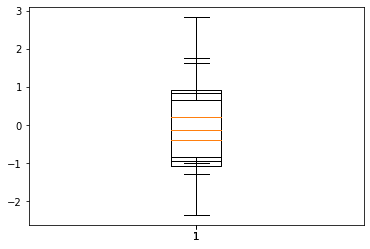

In [11]:
# 9)
scaler = StandardScaler()   #normalize the data
df[['MonthlyCharge', 'TotalCharges', 'TenureinMonths']] = scaler.fit_transform(df[['Monthly Charge', 'Total Charges', 'Tenure in Months']])

plt.boxplot(df['MonthlyCharge'])
plt.boxplot(df['TotalCharges'])
plt.boxplot(df['TenureinMonths'])

In [17]:
# 10)
X = df.drop('Churn Category', axis=1)      #split data into training and testing
y = df['Churn Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(5634, 40)

In [14]:
y_train.shape

(5634,)

In [15]:
X_test.shape

(1409, 40)

In [16]:
y_test.shape

(1409,)

In [18]:
# 11)
df.to_csv("Cleaned_Telecom_Customer_Churn.csv")    #export dataframe to csv